In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [320]:
iris = pd.read_excel('iris.xlsx')

# Exploratory Analysis

In [321]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [322]:
#We can see that they are no missing values in te dataset it is already cleaned 

In [323]:
iris.shape

(150, 5)

In [324]:
print(iris["variety"].value_counts())

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64


# Histogram 

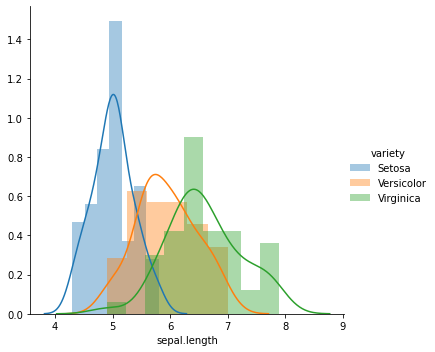

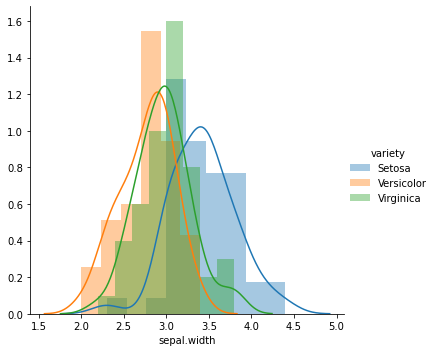

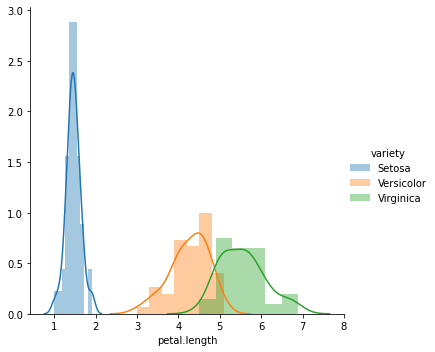

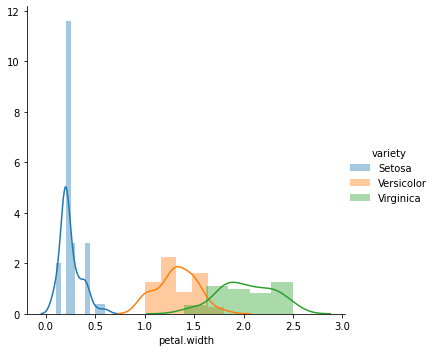

In [325]:
for i, feature in enumerate(list(iris.columns)[:-1]):
    fg = sns.FacetGrid(iris, hue='variety', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

In [326]:
#With the help of the above histogram we can say that setosa is the biggest type of iris flower 
#because it has the highest sepal.length, petal.length and petal.width.

# Converting the varaible to numberic 

In [327]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [328]:
conv = preprocessing.LabelEncoder()
iris["sepal.length"] = conv.fit_transform(iris["sepal.length"])
iris["sepal.width"] = conv.fit_transform(iris["sepal.width"])
iris["petal.length"] = conv.fit_transform(iris["petal.length"])
iris["petal.width"] = conv.fit_transform(iris["petal.width"])
iris["variety"] = conv.fit_transform(iris["variety"])

In [329]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sepal.length  150 non-null    int64
 1   sepal.width   150 non-null    int64
 2   petal.length  150 non-null    int64
 3   petal.width   150 non-null    int64
 4   variety       150 non-null    int64
dtypes: int64(5)
memory usage: 6.0 KB


# Training, Testing and Validation

In [330]:
features = iris.drop('variety', axis=1)
labels = iris['variety']

In [331]:
#60-20-20
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#80-10-10
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test_2, X_val_2, y_test_2, y_val_2 = train_test_split(X_test_2, y_test_2, test_size=0.5, random_state=42)

In [332]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [336]:
X_train_2.to_csv('train_features.csv', index=False)
X_val_2.to_csv('val_features.csv', index=False)
X_test_2.to_csv('test_features.csv', index=False)

y_train_2.to_csv('train_labels.csv', index=False)
y_val_2.to_csv('val_labels.csv', index=False)
y_test_2.to_csv('test_labels.csv', index=False)

# K Fold 

In [337]:
rf = RandomForestClassifier()
rf_ratio1 = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
rf_ratio2 = cross_val_score(rf, X_train_2, y_train_2.values.ravel(), cv=5)

In [339]:
rf_ratio1

array([1.        , 0.72222222, 1.        , 0.94444444, 0.94444444])

In [340]:
rf_ratio2

array([0.95833333, 0.95833333, 0.83333333, 1.        , 0.95833333])

# Random Forest Classifier (HyperParameter)

In [341]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [342]:
#First Ratio
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

gridsearch_rf = GridSearchCV(rf, parameters, cv=5)
gridsearch_rf.fit(X_train, y_train.values.ravel())

print_results(gridsearch_rf)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 50}

0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 5}
0.911 (+/-0.249) for {'max_depth': 2, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 2, 'n_estimators': 100}
0.911 (+/-0.249) for {'max_depth': 10, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 100}
0.911 (+/-0.194) for {'max_depth': 20, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 20, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 20, 'n_estimators': 100}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 100}


In [343]:
#Second Ratio
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

gridsearch_rf_2 = GridSearchCV(rf, parameters, cv=5)
gridsearch_rf_2.fit(X_train_2, y_train_2.values.ravel())

print_results(gridsearch_rf_2)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 50}

0.95 (+/-0.122) for {'max_depth': 2, 'n_estimators': 5}
0.958 (+/-0.129) for {'max_depth': 2, 'n_estimators': 50}
0.925 (+/-0.178) for {'max_depth': 2, 'n_estimators': 100}
0.942 (+/-0.155) for {'max_depth': 10, 'n_estimators': 5}
0.958 (+/-0.091) for {'max_depth': 10, 'n_estimators': 50}
0.942 (+/-0.113) for {'max_depth': 10, 'n_estimators': 100}
0.95 (+/-0.122) for {'max_depth': 20, 'n_estimators': 5}
0.958 (+/-0.091) for {'max_depth': 20, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 20, 'n_estimators': 100}
0.933 (+/-0.155) for {'max_depth': None, 'n_estimators': 5}
0.933 (+/-0.145) for {'max_depth': None, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': None, 'n_estimators': 100}


# Logistic Regression(HyperParameter)

In [195]:
#first ratio
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

lr = LogisticRegression()

gridsearch_lr = GridSearchCV(lr, param_grid=grid, cv=5)
gridsearch_lr.fit(X_train, y_train.values.ravel())

print_results(gridsearch_lr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BEST PARAMS: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

0.933 (+/-0.163) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911 (+/-0.151) for {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.933 (+/-0.178) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.944 (+/-0.172) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.922 (+/-0.206) for {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.944 (+/-0.099) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.944 (+/-0.172) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.944 (+/-0.172) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.878 (+/-0.227) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.933 (+/-0.163) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.933 (+/-0.163) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.778 (+/-0.186) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.933 (+/-0.163) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.933 (+/-0.163) f

In [345]:
#second ratio
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

lr = LogisticRegression()

gridsearch_lr_2 = GridSearchCV(lr, param_grid=grid, cv=5)
gridsearch_lr_2.fit(X_train_2, y_train_2.values.ravel())

print_results(gridsearch_lr_2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

0.95 (+/-0.122) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.933 (+/-0.145) for {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.95 (+/-0.082) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.95 (+/-0.122) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.942 (+/-0.113) for {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.95 (+/-0.082) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.95 (+/-0.122) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.95 (+/-0.122) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.917 (+/-0.091) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.942 (+/-0.113) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.942 (+/-0.113) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.833 (+/-0.075) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.967 (+/-0.097) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.967 (+/-0.097) for {

# SVC(HyperParameter)

In [160]:
#first ratio
svm = SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

gridsearch_svm = GridSearchCV(svm, param_grid, cv=5)
gridsearch_svm.fit(X_train, y_train.values.ravel())

print_results(gridsearch_svm)

BEST PARAMS: {'C': 100, 'kernel': 'linear'}

0.95 (+/-0.122) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.958 (+/-0.129) for {'C': 100, 'kernel': 'linear'}
0.958 (+/-0.129) for {'C': 1000, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.867 (+/-0.17) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.942 (+/-0.113) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.958 (+/-0.129) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [346]:
#second ratio
svm = SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

gridsearch_svm_2 = GridSearchCV(svm, param_grid, cv=5)
gridsearch_svm_2.fit(X_train_2, y_train_2.values.ravel())

print_results(gridsearch_svm_2)

BEST PARAMS: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

0.942 (+/-0.113) for {'C': 1, 'kernel': 'linear'}
0.942 (+/-0.113) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 100, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1000, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.875 (+/-0.149) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.958 (+/-0.129) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.942 (+/-0.113) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


# Evaluating Validation Set 

# RandomForestClassification(Validation)

In [258]:
#first ratio
rf_val = RandomForestClassifier(n_estimators=5, max_depth=10)
rf_val.fit(X_val, y_val.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=5)

In [347]:
#second ratio
rf_val_2 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf_val_2.fit(X_val_2, y_val_2.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=5)

# Logistic Regression(Validation)

In [259]:
#first ratio
lr_val = LogisticRegression()
lr_val.fit(X_val, y_val.values.ravel())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [348]:
#Second ratio
lr_val_2 = LogisticRegression()
lr_val_2.fit(X_val_2, y_val_2.values.ravel())

LogisticRegression()

# SVM(Validation)

In [349]:
#First Ratio
svm_val = SVC()
svm_val.fit(X_val, y_val.values.ravel())

SVC()

In [350]:
#Second Ratio
svm_val_2 = SVC()
svm_val_2.fit(X_val_2, y_val_2.values.ravel())

SVC()

# Accuracy, Precision and Recall(Validation)

In [361]:
#first Ratio
for val in [rf_val, lr_val, svm_val]:
    y_pred = val.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred,average='micro'), 3)
    recall = round(recall_score(y_val, y_pred,average='micro'), 3)
    print('A: {} / P: {} / R: {}'.format(accuracy,precision,recall))

ValueError: X has 4 features, but DecisionTreeClassifier is expecting 5 features as input.

In [351]:
#second Ratio
for val_2 in [rf_val_2, lr_val_2, svm_val_2]:
    y_pred_2 = val_2.predict(X_val_2)
    accuracy_2 = round(accuracy_score(y_val_2, y_pred_2), 3)
    precision_2 = round(precision_score(y_val_2, y_pred_2,average='micro'), 3)
    recall_2 = round(recall_score(y_val_2, y_pred_2,average='micro'), 3)
    print('A: {} / P: {} / R: {}'.format(accuracy_2,precision_2,recall_2))

A: 1.0 / P: 1.0 / R: 1.0
A: 1.0 / P: 1.0 / R: 1.0
A: 1.0 / P: 1.0 / R: 1.0


In [ ]:
#Random forest and Logistic regression alogirthm are the best model in the validation set. 
#Because the accuracy, precision and recall are high and 
#In SVM algorithm all the values(i.e accuracy score,precision score and recall score) are less when compared
#to other models in the Validation Set 

# Evaluation Testing Set

# Random Forest Classification(Testing)

In [262]:
#First Ratio
rf_test = RandomForestClassifier(n_estimators=5, max_depth=10)
rf_test.fit(X_test, y_test.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=5)

In [353]:
#Second Ratio
rf_test_2 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf_test_2.fit(X_test_2, y_test_2.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=5)

# Logistic Regression(Testing)

In [263]:
#First Ratio
lr_test = LogisticRegression()
lr_test.fit(X_test, y_test.values.ravel())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [355]:
#Second Ratio
lr_test_2 = LogisticRegression()
lr_test_2.fit(X_test_2, y_test_2.values.ravel())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# SVM(Testing)

In [264]:
svm_test = SVC()
svm_test.fit(X_test, y_test.values.ravel())

SVC()

In [356]:
svm_test_2 = SVC()
svm_test_2.fit(X_test_2, y_test_2.values.ravel())

SVC()

# Accuracy, Precision and Recall(Testing)

In [270]:
#First Ratio
for test in [rf_test, lr_test, svm_test]:
    y_pred = test.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred,average='micro'), 3)
    recall = round(recall_score(y_test, y_pred,average='micro'), 3)
    print('A: {} / P: {} / R: {}'.format(accuracy,precision,recall))

A: 1.0 / P: 1.0 / R: 1.0
A: 1.0 / P: 1.0 / R: 1.0
A: 0.967 / P: 0.967 / R: 0.967


In [358]:
#Second Ratio
for test_2 in [rf_test_2, lr_test_2, svm_test_2]:
    y_pred_test_2 = test_2.predict(X_test_2)
    accuracy_2 = round(accuracy_score(y_test_2, y_pred_test_2), 3)
    precision_2 = round(precision_score(y_test_2, y_pred_test_2,average='micro'), 3)
    recall_2 = round(recall_score(y_test_2, y_pred_test_2,average='micro'), 3)
    print('A: {} / P: {} / R: {}'.format(accuracy_2,precision_2,recall_2))

A: 1.0 / P: 1.0 / R: 1.0
A: 1.0 / P: 1.0 / R: 1.0
A: 1.0 / P: 1.0 / R: 1.0


In [ ]:
#Logistic Regression and RandomForest is the best model in testing phase because accuracy, precision and recall scores
#are high when compared to other models 

In [ ]:
#Logistic Regression is the best model because in both validation and testing phase it has the highest 
#scores in accuracy, precision and recall and by this way the results will be more accurate when comparing 
#spilt ratio method.